In [1]:
import numpy as np
import pandas as pd
from urllib.parse import urlparse

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import time

In [2]:
def generate_week_strings(start_year, start_week, end_year, end_week):
    week_strings = []

    for year in range(start_year, end_year + 1):
        start = start_week if year == start_year else 1
        end = end_week if year == end_year else 53

        for week in range(start, end + 1):
          #TODO CHANGE LATER range(1, 11)
          for num in range(1, 2):
            #TODO CHANGE LATER range(1, 11)
            week_string = f"week/{year}/{week}/{num}"
            week_strings.append(week_string)

    return week_strings

start_year = 2020
start_week = 15
end_year = 2020
end_week = 20

week_strings = generate_week_strings(start_year, start_week, end_year, end_week)

In [3]:
len(week_strings)

6

In [4]:
week_strings

['week/2020/15/1',
 'week/2020/16/1',
 'week/2020/17/1',
 'week/2020/18/1',
 'week/2020/19/1',
 'week/2020/20/1']

In [5]:
list_of_articles = []
list_of_time_mk_urls = []
for week_string in week_strings:
  week_url = "https://time.mk/" + week_string
  response = requests.get(week_url)
  response.encoding = 'utf-8'
  soup = BeautifulSoup(response.text, "html.parser")
  list_of_articles.extend(soup.find_all(class_="cluster"))
for article in list_of_articles:
  first_anchor_tag = article.select_one('a')
  list_of_time_mk_urls.append("https://time.mk/" + first_anchor_tag.get("href"))

In [6]:
print(list_of_time_mk_urls)

['https://time.mk/r/9068e4b15a/9a07ecc2a0/', 'https://time.mk/r/ae7e77a0e5/25430fb44d/', 'https://time.mk/r/6ba55c8a71/20e15116d9/', 'https://time.mk/r/e94292937d/dae34e86ce/', 'https://time.mk/r/26e21000c2/19a5655470/', 'https://time.mk/r/5e384a9dfc/5bf1a0b9e3/', 'https://time.mk/r/e9a0783157/f35729cc71/', 'https://time.mk/r/5942e809ad/3fe888e5e1/', 'https://time.mk/r/53d6c9f5c1/0b2ce4efa2/', 'https://time.mk/r/5f682b46fb/c0726bade6/', 'https://time.mk/r/c6e385f261/a1eedde4d4/', 'https://time.mk/r/317ba786c8/1f54c70377/', 'https://time.mk/r/215ef78ae6/5f7a131255/', 'https://time.mk/r/971b3ff52f/decb96cdfe/', 'https://time.mk/r/c88d61e521/26c91bdd17/', 'https://time.mk/r/a7b34181d6/9f6275f767/', 'https://time.mk/r/83b937d2c9/3adb84fb5f/', 'https://time.mk/r/fd43531e81/fffb8d45f1/', 'https://time.mk/r/cc6737d5e1/1a8ceaae32/', 'https://time.mk/r/7a6b648473/164e60b43f/', 'https://time.mk/r/aa54c4f4d2/84cda2a7b0/', 'https://time.mk/r/044c7a7a24/9630624038/', 'https://time.mk/r/b094762563/d

In [7]:
len(list_of_time_mk_urls)

60

In [8]:

def parseVecerNews(url, content):
    
  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  # subtitle = soup.find(class_='td-post-sub-title').text.strip() if soup.find(class_='td-post-sub-title') else None
  subtitle = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  date = soup.find(class_='entry-date updated td-module-date').text.strip() if soup.find(class_='entry-date updated td-module-date') else None
  main_content = soup.find(class_='td-post-content').text.strip() if soup.find(class_='td-post-content') else None

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseNovaMakedonijaNews(url, content):
  
  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  subtitle = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  date = soup.find(class_='entry-date updated td-module-date').text.strip() if soup.find(class_='entry-date updated td-module-date') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseTv21News(url, content):

  soup = BeautifulSoup(content, 'html.parser')
  title = soup.find(class_='tdb-title-text').text.strip() if soup.find(class_='tdb-title-text') else None
  subtitle = soup.find(class_='tdb-title-text').text.strip() if soup.find(class_='tdb-title-text') else None
  date = soup.find(class_='entry-date updated td-module-date').text.strip() if soup.find(class_='entry-date updated td-module-date') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = '\n'.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parse360stepeni(url, content):

  soup = BeautifulSoup(content, 'html.parser')
  title = soup.find(class_='txt--white txt--center').text.strip() if soup.find(class_='txt--white txt--center') else None
  subtitle = soup.find(class_='txt--white txt--center').text.strip() if soup.find(class_='txt--white txt--center') else None
  date = soup.find(class_='single__post-meta single__post_author txt--center').text.strip() if soup.find(class_='single__post-meta single__post_author txt--center') else None
  main_content = soup.find(class_='entry-content').text.strip() if soup.find(class_='entry-content') else None
  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseAlfaNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  subtitle = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  date = soup.find(class_='item-metadata posts-date').text.strip() if soup.find(class_='item-metadata posts-date') else None
  main_content = soup.find(class_='entry-content').text.strip() if soup.find(class_='entry-content') else None

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSitelNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find('div', class_='panel-pane pane-node-title').find("h1").text.strip() if soup.find('div', class_='panel-pane pane-node-title').find("h1") else None
  subtitle = soup.find('div', class_='panel-pane pane-node-title').find("h1").text.strip() if soup.find('div', class_='panel-pane pane-node-title').find("h1") else None
  date = soup.find(class_='data-na-objava').text.strip() if soup.find(class_='data-na-objava') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSdkNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find(class_='post-title entry-title').text.strip() if soup.find(class_='post-title entry-title') else None
  subtitle = soup.find(class_='post-title entry-title').text.strip() if soup.find(class_='post-title entry-title') else None
  date = soup.find("span", class_='value').text.strip() if soup.find("span", class_='value') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseFokusNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find(class_='post-title single-post-title entry-title').text.strip() if soup.find(class_='post-title single-post-title entry-title') else None
  subtitle = soup.find(class_='post-title single-post-title entry-title').text.strip() if soup.find(class_='post-title single-post-title entry-title') else None
  date = soup.find(class_='entry-date published').text.strip() if soup.find(class_='entry-date published') else None

  news_paragraphs = soup.find(class_="inner-post-entry entry-content").find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSport1News(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find(class_='title').text.strip() if soup.find(class_='title') else None
  subtitle = soup.find(class_='teaser field').text.strip() if soup.find(class_='teaser field') else None
  date = soup.find(class_='submitted').text.strip() if soup.find(class_='submitted') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseKanal5News(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='article-title').text.strip() if soup.find("h1", class_='article-title') else None
  subtitle = soup.find(class_='subtitle').text.strip() if soup.find(class_='subtitle') else None
  date = soup.find(class_='article-published').text.strip() if soup.find(class_='article-published') else None
  main_content = soup.find(class_ = 'article-text').text.strip() if soup.find(class_ = 'article-text') else None

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseRepublikaNews(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='title mb-3').text.strip() if soup.find("h1", class_='title mb-3') else None
  subtitle = soup.find("h1", class_='title mb-3').text.strip() if soup.find("h1", class_='title mb-3') else None
  date = soup.find("span", class_='date').text.strip() if soup.find("span", class_='date') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parsePuls24News(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  subtitle = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  date = soup.find(class_='entry-date updated published').text.strip() if soup.find(class_='entry-date updated published') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMkdNews(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='main-article-title').text.strip() if soup.find("h1", class_='main-article-title') else None
  subtitle = soup.find("div", id='podnaslov').text.strip() if soup.find("div", id='podnaslov') else None
  date = soup.find(class_='row mx-0 article-info mb-3').find("div").find("div").text.strip() if soup.find(class_='row mx-0 article-info mb-3').find("div").find("div") else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseAlsatNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='post-title entry-title').text.strip() if soup.find("h1", class_='post-title entry-title') else None
  subtitle = soup.find(class_='entry-sub-title').text.strip() if soup.find(class_='entry-sub-title') else None
  date = soup.find(class_='date meta-item tie-icon').text.strip() if soup.find(class_='date meta-item tie-icon') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSlobodnaEvropaNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  subtitle = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  date = soup.find("time").text.strip() if soup.find("time") else None
  main_content = soup.find(class_="wsw").text.strip() if soup.find(class_="wsw") else None

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMakfaksNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='mvp-post-title left entry-title').text.strip() if soup.find("h1", class_='mvp-post-title left entry-title') else None
  subtitle = soup.find("h1", class_='mvp-post-title left entry-title').text.strip() if soup.find("h1", class_='mvp-post-title left entry-title') else None
  date = soup.find(class_="post-date updated").text.strip() if soup.find(class_="post-date updated") else None

  news_paragraphs = soup.find(id="mvp-content-main").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMkVoaNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  subtitle = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  date = soup.find("time").text.strip() if soup.find("time") else None

  news_paragraphs = soup.find(class_="wsw").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseNetpressNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  subtitle = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  date = soup.find(class_="entry-date updated td-module-date").text.strip() if soup.find(class_="entry-date updated td-module-date") else None

  news_paragraphs = soup.find(class_="td-post-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSlobodenPecatNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='post-main-title').text.strip() if soup.find("h1", class_='post-main-title') else None
  subtitle = soup.find("h1", class_='post-main-title').text.strip() if soup.find("h1", class_='post-main-title') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time") else None

  news_paragraphs = soup.find(class_="post-body-inner").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMakpressNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find("div", class_='page-header').find("h1").text.strip() if soup.find("div", class_='page-header') else None
  subtitle = soup.find("div", class_='page-header').find("h1").text.strip() if soup.find("div", class_='page-header').find("h1") else None
  date = soup.find("div", class_="time").text.strip() if soup.find("div", class_="time") else None

  news_paragraphs = soup.find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseDWNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.select_one(".content-area").find("header").find("h1").text.strip() if soup.select_one(".content-area").find("header").find("h1") else None
  subtitle = soup.select_one(".content-area").find("header").find("h1").text.strip() if soup.select_one(".content-area").find("header").find("h1") else None
  date = soup.find("time").text.strip() if soup.find("time") else None

  news_paragraphs = soup.select_one(".rich-text.has-italic").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parse24MkNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find(class_="post-title-area").find("h2", class_='post-title').text.strip() if soup.find(class_="post-title-area").find("h2", class_='post-title') else None
  subtitle = soup.find(class_="post-title-area").find("h2", class_='post-title').text.strip() if soup.find(class_="post-title-area").find("h2", class_='post-title') else None
  date = soup.find("span", class_="post-date").text.strip() if soup.find("span", class_="post-date") else None

  news_paragraphs = soup.find(class_="entry-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseRadioMofNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='post-title').text.strip() if soup.find("h1", class_='post-title') else None
  subtitle = soup.find("h1", class_='post-title').text.strip() if soup.find("h1", class_='post-title') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

  news_paragraphs = soup.find(class_="post-content description").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseCentarMkNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title penci-entry-title penci-title-center').text.strip() if soup.find("h1", class_='entry-title penci-entry-title penci-title-center') else None
  subtitle = soup.find("h1", class_='entry-title penci-entry-title penci-title-center').text.strip() if soup.find("h1", class_='entry-title penci-entry-title penci-title-center') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

  news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseA1OnNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title penci-entry-title').text.strip() if soup.find("h1", class_='entry-title penci-entry-title') else None
  subtitle = soup.find("h1", class_='entry-title penci-entry-title').text.strip() if soup.find("h1", class_='entry-title penci-entry-title') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

  news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseTelmaNews(url, content):

    soup = BeautifulSoup(content, 'html.parser')
    title = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    subtitle = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

    news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
    # Accumulate the text from all news paragraphs
    main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

    news_data = {
        'url' : url,
        'title': title,
        'subtitle': subtitle,
        'date': date,
        'main_content': main_content
    }
    
    return news_data

def parseEMagazinNews(url, content):

    soup = BeautifulSoup(content, 'html.parser')
    title = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    subtitle = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

    news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
    # Accumulate the text from all news paragraphs
    main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

    news_data = {
        'url' : url,
        'title': title,
        'subtitle': subtitle,
        'date': date,
        'main_content': main_content
    }
    
    return news_data

In [9]:
from requests.exceptions import ConnectTimeout, ConnectionError
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
session = requests.Session()
retries = Retry(total=5, backoff_factor=0.1, status_forcelist=[500, 502, 503, 504])
adapter = HTTPAdapter(max_retries=retries)
session.mount('http://', adapter)
session.mount('https://', adapter)

successfully_accessed_sites = []
successfully_accessed_hostnames = []
unsuccessfully_accessed_sites = []

real_urls_list = []
parsedTexts = []

start_time = time.time()


for time_url in list_of_time_mk_urls:
    try:
          response = requests.get(time_url)
          # Gets the real url for each time.mk url.
          real_url = response.url
          real_urls_list.append(real_url)
          if response.status_code!=200:
                unsuccessfully_accessed_sites.append(real_url)
          else:
            successfully_accessed_sites.append(real_url)
            successfully_accessed_hostnames.append(urlparse(real_url).hostname)
            # Gets the html content for each response
            content = response.content
            # Gets the hostname for each url
            hostname = urlparse(real_url).hostname
            if hostname == "www.vecer.press":
                parsedTexts.append(parseVecerNews(real_url, content))
            elif hostname == "mk.tv21.tv":
                parsedTexts.append(parseTv21News(real_url, content))
            elif hostname == "360stepeni.mk":
                parsedTexts.append(parse360stepeni(real_url, content))
            elif hostname == "alfa.mk":
                parsedTexts.append(parseAlfaNews(real_url, content))
            elif hostname == "sitel.com.mk":
                parsedTexts.append(parseSitelNews(real_url, content))
            elif hostname == "sdk.mk":
                parsedTexts.append(parseSdkNews(real_url, content))
            elif hostname == "fokus.mk":
                parsedTexts.append(parseFokusNews(real_url, content))
            elif hostname == "sport1.mk":
                parsedTexts.append(parseSport1News(real_url, content))
            elif hostname == "kanal5.com.mk":
                parsedTexts.append(parseKanal5News(real_url, content))
            elif hostname == "republika.mk":
                parsedTexts.append(parseRepublikaNews(real_url, content))
            elif hostname == "puls24.mk":
                parsedTexts.append(parsePuls24News(real_url, content))
            elif hostname == "mkd.mk":
                parsedTexts.append(parseMkdNews(real_url, content))
            elif hostname == "novamakedonija.com.mk":
                parsedTexts.append(parseNovaMakedonijaNews(real_url, content))
            elif hostname == "alsat.mk":
                parsedTexts.append(parseAlsatNews(real_url, content))
            elif hostname == "www.slobodnaevropa.mk":
                parsedTexts.append(parseSlobodnaEvropaNews(real_url, content))
            elif hostname == "makfax.com.mk":
                parsedTexts.append(parseMakfaksNews(real_url, content))
            elif hostname == "mk.voanews.com":
                parsedTexts.append(parseMkVoaNews(real_url, content))
            elif hostname == "netpress.com.mk":
                parsedTexts.append(parseNetpressNews(real_url, content))
            elif hostname == "www.slobodenpecat.mk":
                parsedTexts.append(parseSlobodenPecatNews(real_url, content))
            elif hostname == "makpress.mk":
                parsedTexts.append(parseMakpressNews(real_url, content))
            elif hostname == "www.dw.com":
                parsedTexts.append(parseDWNews(real_url, content))
            elif hostname == "24.mk":
                parsedTexts.append(parse24MkNews(real_url, content))
            elif hostname == "www.radiomof.mk":
                parsedTexts.append(parseRadioMofNews(real_url, content))
            elif hostname == "centar.mk":
                parsedTexts.append(parseCentarMkNews(real_url, content))
            elif hostname == "a1on.mk":
                parsedTexts.append(parseA1OnNews(real_url, content))
            elif hostname == "telma.com.mk":
                parsedTexts.append(parseTelmaNews(real_url, content))
            elif hostname == "emagazin.mk":
                parsedTexts.append(parseEMagazinNews(real_url, content))
#             else:
#                 parsedTexts.append("Parse function for hostname " + hostname + " doesn't exist yet.")

    except (ConnectTimeout, ConnectionError) as e:
        print(f"Error connecting to {time_url}: {str(e)}")
        unsuccessfully_accessed_sites.append(time_url)
        continue
        
end_time = time.time()
total_time = end_time - start_time

print(f"The total time to parse all news sites is {total_time} seconds.")

The total time to parse all news sites is 115.91880917549133 seconds.


In [10]:
len(real_urls_list)

60

In [11]:
print(len(successfully_accessed_sites))
print(len(successfully_accessed_hostnames))
print(len(unsuccessfully_accessed_sites))

57
57
3


In [12]:
len(successfully_accessed_sites)

57

In [13]:
len(parsedTexts)

50

In [14]:
# parsedTexts

In [15]:
news_items = parsedTexts.copy()

In [16]:
for news_item in news_items:
    news_item['main_content'] = news_item['main_content'].replace('\n', '') if news_item['main_content'] != None else None
    news_item['main_content'] = news_item['main_content'].replace('\xa0', '') if news_item['main_content'] != None else None
    news_item['title'] = news_item['title'].replace('\xa0', '') if news_item['title'] != None else None
    news_item['subtitle'] = news_item['subtitle'].replace('\xa0', '') if news_item['subtitle'] != None else None

In [17]:
url_text_map = {}
for news_item in news_items:
  entry_url = news_item["url"]
  text = f"{news_item['title']}. {news_item['subtitle']}. {news_item['main_content']}"
  url_text_map[entry_url] = text

In [18]:
!pip install transformers
!pip install nlp
!pip install sentencepiece
!pip install torch
!pip install spacy
!pip install vaderSentiment
!pip install textblob
!pip install wordcloud matplotlib

In [19]:
# !python -m spacy download en_core_web_sm

In [18]:
import transformers
import nlp
import torch
import spacy
from transformers import pipeline
from transformers import MarianMTModel, MarianTokenizer

import nltk
# nltk.download('punkt')

In [19]:
# Deprecated

# def chunk_text(text, tokenizer, max_length=1024):
#     # Split the text into sentences
#     sentences = nltk.sent_tokenize(text)
    
#     chunks = []
#     current_chunk = []
#     current_length = 0
    
#     for sentence in sentences:
#         # Tokenize the sentence to get its length
#         sentence_length = len(tokenizer.tokenize(sentence))
        
#         if current_length + sentence_length <= max_length:
#             current_chunk.append(sentence)
#             current_length += sentence_length
#         else:
#             chunks.append(" ".join(current_chunk))
#             current_chunk = [sentence]
#             current_length = sentence_length
    
#     if current_chunk:
#         chunks.append(" ".join(current_chunk))
    
#     return chunks


In [20]:
# # METHOD 1: Translate using MarianMT, A framework for translation models
# # Helsinki-NLP/opus-mt-mk-en

# # Load the pre-trained model and tokenizer
# model_name = "Helsinki-NLP/opus-mt-mk-en"
# model = MarianMTModel.from_pretrained(model_name)
# tokenizer = MarianTokenizer.from_pretrained(model_name)

In [21]:
# start_time = time.time()

# url_text_list = list(url_text_map.items())
# marian_translated_texts = {}
# for url_text in url_text_list[:1]:

#     # Define the input Macedonian text
    
#     input_url = url_text[0]
#     input_text = url_text[1]

#     # Split text into sentences using the Natural Language Toolkit Library
#     sentences = nltk.sent_tokenize(input_text)
    
#     # Translate each sentence separately
#     translated_sentences = []
#     for sentence in sentences:
#         input_ids = tokenizer.encode(sentence, return_tensors="pt")
#         with torch.no_grad():
#             translated_ids = model.generate(input_ids)
#         translated_sentence = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
#         translated_sentences.append(translated_sentence)

#     # Combine translated sentences
#     translated_text = " ".join(translated_sentences)
#     marian_translated_texts[input_url] = translated_text
    
    
# end_time = time.time()
# total_time = end_time - start_time

# print(f"The total time to translate the text is {total_time} seconds.")

In [22]:
# marian_translated_texts

In [25]:
!pip install googletrans==4.0.0rc1

In [23]:
# METHOD 2: Translate using Google Translate API
from googletrans import Translator
import time
import random

# Time and random are so that google doesn't block my IP address because of a large number of requests

start_time = time.time()
url_text_list = list(url_text_map.items())
google_translated_texts = {}
translator = Translator()
for url_text in url_text_list:
    translated_text = translator.translate(url_text[1][:5000], src='mk', dest='en').text
    google_translated_texts[url_text[0]] = translated_text
    time.sleep(random.uniform(0.02, 0.1))

end_time = time.time()
total_time = end_time - start_time

print(f"The total time to translate the text is {total_time} seconds.")

The total time to translate the text is 18.412167072296143 seconds.


In [24]:
len(google_translated_texts)

46

In [25]:
# print(google_translated_texts)

In [26]:
# # METHOD 3: Translate using distilled version of the  Facebook Neural Language Model for Low-Resource Languages (NLLB-200)
# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M", src_lang="mk_Cyrl")
# model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")


In [27]:
# start_time = time.time()


# url_text_list = list(url_text_map.items())
# nllb_translated_texts = {}
# for url_text in url_text_list[:1]:
    
#     # Define the input Macedonian text
    
#     input_url = url_text[0]
#     input_text = url_text[1]
    
#     sentences = nltk.sent_tokenize(input_text)

#     translated_sentences = []
#     for sentence in sentences:
#         inputs = tokenizer(sentence, return_tensors="pt")
#         translated_tokens = model.generate(
#         **inputs, forced_bos_token_id=tokenizer.lang_code_to_id["eng_Latn"]
#         )
#         translated_sentence = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
#         translated_sentences.append(translated_sentence)
    
#     # Combine translated sentences
#     translated_text = " ".join(translated_sentences)
#     nllb_translated_texts[input_url] = translated_text
    
# end_time = time.time()
# total_time = end_time - start_time

# print(f"The total time to translate the text is {total_time} seconds.")

In [28]:
# nllb_translated_texts

In [29]:
# CONTINUE USING ONLY GOOGLE TRANSLATED TEXTS FOR BEST ACCURACY

In [39]:
# Function to aggregate the sentiment for a single entity, since a single entity will have multiple sentiments
# if the entity is present in multiple sentences.
# sentiments contains a list of all the sentiments for a single entity that were gathered from the text

def aggregate_sentiment(sentiments, entity_type):
    # Initialize counters
    total_positive = 0
    total_negative = 0
    count_positive = 0
    count_negative = 0
    
    for sentiment in sentiments:
        if sentiment['label'] == 'POSITIVE':
            total_positive += sentiment['score']
            count_positive += 1
        elif sentiment['label'] == 'NEGATIVE':
            total_negative += sentiment['score']
            count_negative += 1
            


    if total_positive > total_negative:
        return {'type': entity_type, 'label': 'POSITIVE', 'total_positive': total_positive, 'total_negative': total_negative, 'count_positive': count_positive, 'count_negative': count_negative}
    else:
        return {'type': entity_type, 'label': 'NEGATIVE', 'total_positive': total_positive, 'total_negative': total_negative, 'count_positive': count_positive, 'count_negative': count_negative}

In [44]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define sentiment analysis pipeline using transformers
# sentiment_pipeline = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Extracts entities and sentiment for a single text
def extract_entities_and_sentiment(text):
    doc = nlp(text)
    
    # Store entity sentiments
    entity_sentiments = {}
    
    # Store sentences and entity label for each entity
    entity_sentences = {}
    
    for ent in doc.ents:
        if ent.text not in entity_sentences:
            entity_sentences[ent.text] = {"sentences": [ent.sent.text], "entity_type": ent.label_}
        else:
            entity_sentences[ent.text]["sentences"].append(ent.sent.text)
            
    for entity, info in entity_sentences.items():
        sentiments = []
        for sentence in info["sentences"]:
            sentiment = sentiment_pipeline(sentence)
            sentiments.append(sentiment[0])
        
        entity_sentiments[entity] = aggregate_sentiment(sentiments, info["entity_type"])

    return entity_sentiments

In [45]:
entity_sentiments = []
google_translated_texts_list = list(google_translated_texts.items())
url_sentiments = []
for url_translated_text in google_translated_texts_list:
    entity_sentiments = extract_entities_and_sentiment(url_translated_text[1])
    url_sentiments.append([url_translated_text[0], entity_sentiments])
    

 

In [46]:
url_sentiments

[['https://24.mk/details/brojot-na-zarazeni-so-koronavirus-760-lica-manu-prognozira-pikot-da-bide-na-pochetok-na-maj-so-1-100',
  {'760': {'type': 'CARDINAL',
    'label': 'NEGATIVE',
    'total_positive': 0,
    'total_negative': 3.865076005458832,
    'count_positive': 0,
    'count_negative': 4},
   'MANU': {'type': 'ORG',
    'label': 'NEGATIVE',
    'total_positive': 0.9506388306617737,
    'total_negative': 3.852744162082672,
    'count_positive': 1,
    'count_negative': 4},
   'the beginning of May': {'type': 'DATE',
    'label': 'NEGATIVE',
    'total_positive': 0,
    'total_negative': 2.9239572882652283,
    'count_positive': 0,
    'count_negative': 3},
   '49': {'type': 'CARDINAL',
    'label': 'NEGATIVE',
    'total_positive': 0,
    'total_negative': 0.9757880568504333,
    'count_positive': 0,
    'count_negative': 1},
   'yesterday': {'type': 'DATE',
    'label': 'NEGATIVE',
    'total_positive': 0,
    'total_negative': 3.8731754422187805,
    'count_positive': 0,
   

In [37]:
# THE FINAL RESULT UNTIL NOW IS url_sentiments: List of [url, entity_sentiments: map of key entity and value sentiment]

In [47]:
def get_hostname(url):
    return urlparse(url).hostname

# This function is used to merge the list of entity_sentiment of two urls that have the same hostname
# entity_sentiments1, entity_sentiments2 are maps with key entity and value sentiment
def merge_sentiments(entity_sentiments1, entity_sentiments2):
    for entity, sentiment_values in entity_sentiments2.items():
        if entity not in entity_sentiments1:
            entity_sentiments1[entity] = sentiment_values
        else:
            for key, value in sentiment_values.items():
                if key.startswith('total_') or key.startswith('count_'):
                    entity_sentiments1[entity][key] += value
               
    return entity_sentiments1

In [48]:
# Transform from url_sentiments list to hostname_sentiments list
# Merge the sentiment values for the same entity
# Append the sentiment values for new entities
hostname_sentiments = {}

for url, sentiments in url_sentiments:
    hostname = get_hostname(url)
    if hostname not in hostname_sentiments:
        hostname_sentiments[hostname] = sentiments
    else:
        hostname_sentiments[hostname] = merge_sentiments(hostname_sentiments[hostname], sentiments)

# Convert the dictionary back to a list
hostname_sentiments_list = [[hostname, sentiments] for hostname, sentiments in hostname_sentiments.items()]


# Calculate average score for each entity for each hostname

for hostname, sentiments in hostname_sentiments_list:
    for entity, sentiment in sentiments.items():
        if sentiment['label'] == 'POSITIVE':
            sentiment['score'] = sentiment['total_positive'] / sentiment['count_positive']
        else:
            sentiment['score'] = sentiment['total_negative'] / sentiment['count_negative']

print(hostname_sentiments_list)

[['24.mk', {'760': {'type': 'CARDINAL', 'label': 'NEGATIVE', 'total_positive': 0, 'total_negative': 3.865076005458832, 'count_positive': 0, 'count_negative': 4, 'score': 0.966269001364708}, 'MANU': {'type': 'ORG', 'label': 'NEGATIVE', 'total_positive': 0.9506388306617737, 'total_negative': 3.852744162082672, 'count_positive': 1, 'count_negative': 4, 'score': 0.963186040520668}, 'the beginning of May': {'type': 'DATE', 'label': 'NEGATIVE', 'total_positive': 0, 'total_negative': 2.9239572882652283, 'count_positive': 0, 'count_negative': 3, 'score': 0.9746524294217428}, '49': {'type': 'CARDINAL', 'label': 'NEGATIVE', 'total_positive': 0, 'total_negative': 0.9757880568504333, 'count_positive': 0, 'count_negative': 1, 'score': 0.9757880568504333}, 'yesterday': {'type': 'DATE', 'label': 'NEGATIVE', 'total_positive': 0, 'total_negative': 3.8731754422187805, 'count_positive': 0, 'count_negative': 4, 'score': 0.9682938605546951}, 'two': {'type': 'CARDINAL', 'label': 'NEGATIVE', 'total_positive'

In [40]:
# print("Max index that can be set as hostname_index is " + str(len(hostname_sentiments_list) - 1))

In [49]:
i=0
for hostname, sentiment in hostname_sentiments_list:
    print(str(i) + ": " + hostname)
    i+=1

0: 24.mk
1: fokus.mk
2: mk.voanews.com
3: kanal5.com.mk
4: www.slobodnaevropa.mk
5: 360stepeni.mk
6: mk.tv21.tv
7: sitel.com.mk
8: alsat.mk
9: netpress.com.mk


In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = hostname_sentiments_list
# CHOOSE THE INDEX FOR THE NEWS PORTAL YOU WANT TO FIND INFORMATION FOR
hostname_index = 3

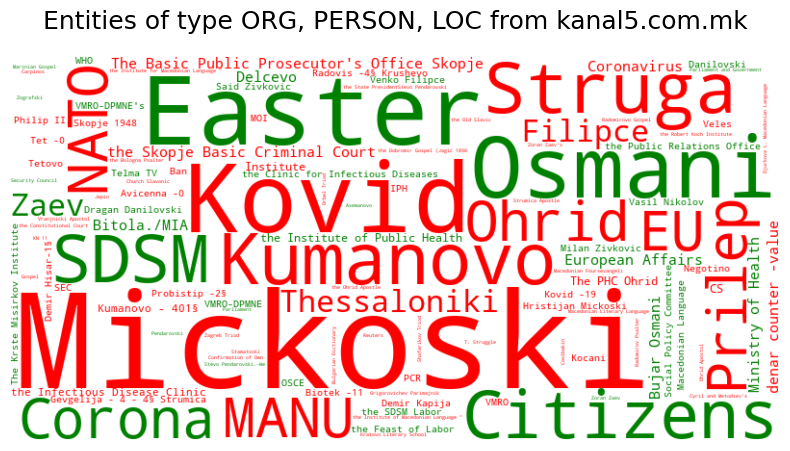

In [106]:
# WITHOUT COLOR INTENSITY BASED ON COUNT

# Specify the entity types you want to include in the word clouds
desired_types = ['ORG', 'PERSON', 'LOC']

# Extract entities of the desired type and their respective counts
word_frequencies = {entity: details['count_positive'] if details['label'] == 'POSITIVE' else details['count_negative'] 
                    for entity, details in data[hostname_index][1].items() if details['type'] in desired_types}

def color_func(word, **kwargs):
    label = data[hostname_index][1][word]['label']
    if label == 'POSITIVE':
        return "green"
    elif label == 'NEGATIVE':
        return "red"
    return "black"  # default

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=color_func).generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Entities of type {', '.join(desired_types)} from " + data[hostname_index][0], fontsize=18, pad=20)
plt.show()

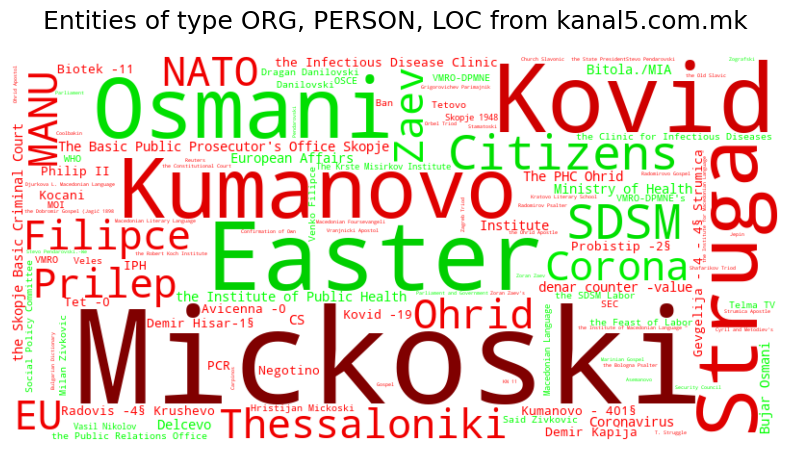

In [111]:
# WITH COLOR INTENSITY BASED ON COUNT
# Green means positive sentiment for entity
# Red means negative sentiment for entity
# Darker shades mean that the positive/negative count is big
# Lighter shades mean that the positive/negative count is small
import colorsys

desired_types = ['ORG', 'PERSON', 'LOC']

word_frequencies = {entity: details['count_positive'] if details['label'] == 'POSITIVE' else details['count_negative'] 
                    for entity, details in data[hostname_index][1].items() if details['type'] in desired_types}

max_frequency = max(word_frequencies.values())
min_frequency = min(word_frequencies.values())

def adjust_color_intensity(color, frequency):
    # Adjust the color intensity based on frequency
    ratio = (frequency - min_frequency) / (max_frequency - min_frequency)
    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(*color)
    # Adjust lightness based on the ratio
    l = l * (1 - 0.5 * ratio)
    # Convert back to RGB
    return '#%02x%02x%02x' % tuple(round(i * 255) for i in colorsys.hls_to_rgb(h, l, s))

def color_func(word, **kwargs):
    details = data[hostname_index][1][word]
    label = details['label']
    if label == 'POSITIVE':
        count = details['count_positive']
        return adjust_color_intensity((0, 1, 0), count)  # RGB for green
    elif label == 'NEGATIVE':
        count = details['count_negative']
        return adjust_color_intensity((1, 0, 0), count)  # RGB for red
    return "black"

wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=color_func).generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Entities of type {', '.join(desired_types)} from " + data[hostname_index][0], fontsize=18, pad=20)
plt.show()

In [114]:
data[hostname_index][1]["Kumanovo"]

{'type': 'ORG',
 'label': 'NEGATIVE',
 'total_positive': 0,
 'total_negative': 2.673769950866699,
 'count_positive': 0,
 'count_negative': 3,
 'score': 0.8912566502888998}

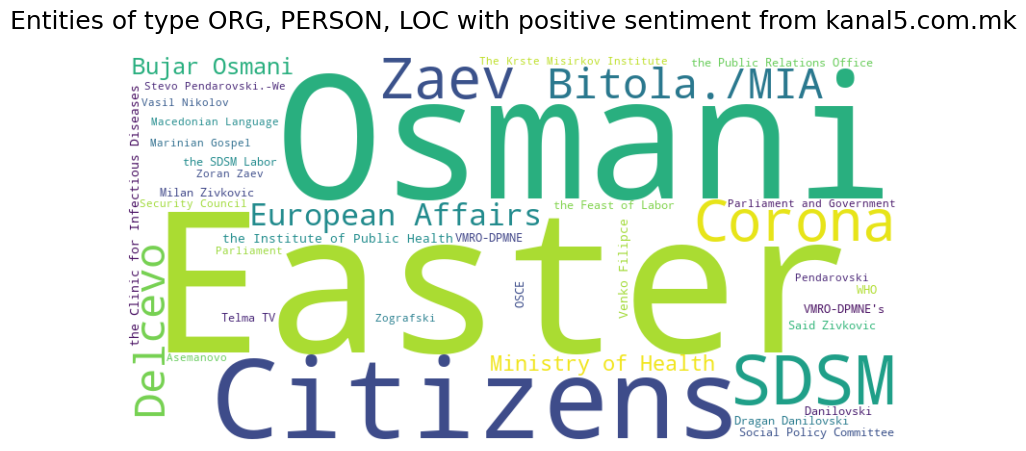

In [115]:
# Extract entities and their respective counts (here I'm using the positive counts) only if their label is POSITIVE
word_frequencies = {entity: details['count_positive'] for entity, details in data[hostname_index][1].items() if details['label'] == 'POSITIVE' and details['type'] in desired_types}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Entities of type {', '.join(desired_types)} with positive sentiment from " + data[hostname_index][0], fontsize=18, pad=20)
plt.show()

In [ ]:
# Extract entities and their respective counts (here I'm using the negative counts) only if their label is NEGATIVE
word_frequencies = {entity: details['count_negative'] for entity, details in data[hostname_index][1].items() if details['label'] == 'NEGATIVE' and details['type'] in desired_types}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Entities of type {', '.join(desired_types)} with negative sentiment from " + data[hostname_index][0], fontsize=18, pad=20)
plt.show()

In [53]:
# # Find entities that show up the most in all news portals
# for hostname, sentiment in hostname_sentiments_list:
    
print("News portals and how many times they mention an entity:\n")
    
for hostname, entity_sentiment_map in hostname_sentiments_list:
    # Creates a list of tuples (entity_name, total_mentions)
    mentions = [(entity, details['count_positive'] + details['count_negative']) for entity, details in entity_sentiment_map.items()]
    
    sorted_mentions = sorted(mentions, key=lambda x: x[1], reverse=True)
    
    top_20_entities = sorted_mentions[:20]
    
    print(hostname)
    for entity, count in top_20_entities:
        print(f"  {entity}: {count} mentions")
    print("\n")

News portals and how many times they mention an entity:

24.mk
  MANU: 5 mentions
  760: 4 mentions
  yesterday: 4 mentions
  Gunzburg: 4 mentions
  Russia: 4 mentions
  the beginning of May: 3 mentions
  Skopje: 3 mentions
  US: 3 mentions
  the United States: 3 mentions
  the middle of the: 3 mentions
  85-hour: 3 mentions
  early May: 3 mentions
  the past 24 hours: 3 mentions
  the end of the summer: 3 mentions
  14: 2 mentions
  Kumanovo: 2 mentions
  six: 2 mentions
  Prilep: 2 mentions
  late April: 2 mentions
  103: 2 mentions


fokus.mk
  first: 6 mentions
  today: 4 mentions
  Austria: 4 mentions
  the last 24 hours: 4 mentions
  Zaev: 4 mentions
  third: 3 mentions
  67: 3 mentions
  Vienna: 3 mentions
  Spain: 3 mentions
  September: 3 mentions
  660,000: 3 mentions
  2019: 2 mentions
  2020: 2 mentions
  Easter 84: 2 mentions
  the past 24 hours: 2 mentions
  Elisa: 2 mentions
  28: 2 mentions
  Kovid-19: 2 mentions
  three: 2 mentions
  daily: 2 mentions


mk.voanews.com


In [54]:
def get_sentiment_difference(entity_data_1, entity_data_2):
    portal1_sentiment = entity_data_1.get('total_positive', 0) - entity_data_1.get('total_negative', 0)
    portal2_sentiment = entity_data_2.get('total_positive', 0) - entity_data_2.get('total_negative', 0)
    return abs(portal1_sentiment - portal2_sentiment)

def find_top_differences(data):
    diff_list = []
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            portal1, portal2 = data[i], data[j]
            common_entities = set(portal1[1].keys()) & set(portal2[1].keys())
            for entity in common_entities:
                diff_value = get_sentiment_difference(portal1[1][entity], portal2[1][entity])
                diff_list.append(((portal1[0], portal2[0], entity), diff_value))
    
    diff_list.sort(key=lambda x: x[1], reverse=True)
    return [x[0] for x in diff_list[:10]]

top_diff = find_top_differences(data)
print("These are the news sites and the entities that they have the most drastically different opinions on:\n")
print(top_diff)

These are the news sites and the entities that they have the most drastically different opinions on:

[('kanal5.com.mk', '360stepeni.mk', 'Macedonian'), ('24.mk', 'mk.tv21.tv', 'Skopje'), ('mk.voanews.com', 'mk.tv21.tv', 'Skopje'), ('kanal5.com.mk', 'mk.tv21.tv', 'Kovid'), ('24.mk', 'kanal5.com.mk', 'Easter'), ('kanal5.com.mk', 'netpress.com.mk', 'Delcevo'), ('mk.voanews.com', 'kanal5.com.mk', 'Easter'), ('fokus.mk', 'mk.tv21.tv', '1'), ('24.mk', 'mk.tv21.tv', '1'), ('kanal5.com.mk', 'mk.tv21.tv', 'Parliament')]


In [55]:
for hostname, entity_sentiments in data:
    if(hostname == "kanal5.com.mk" or hostname == "netpress.com.mk"):
        print(hostname + ": " + str(entity_sentiments["Delcevo"]))

kanal5.com.mk: {'type': 'PERSON', 'label': 'POSITIVE', 'total_positive': 0.9989245533943176, 'total_negative': 0, 'count_positive': 1, 'count_negative': 0, 'score': 0.9989245533943176}
netpress.com.mk: {'type': 'PERSON', 'label': 'NEGATIVE', 'total_positive': 0, 'total_negative': 3.561493992805481, 'count_positive': 0, 'count_negative': 4, 'score': 0.8903734982013702}


In [ ]:
# WRITE NEWS TO FILE
################################################################################################################################
# file_path = "final.txt"
# delimiter = "____###DELIMITER###____"  # Choose a delimiter that won't appear in your data

# with open(file_path, "w", encoding="utf-8") as file:
#     # Iterate through the map and write each key-value pair
#     for key, value in translated_texts.items():
#         file.write(f"{key}{delimiter}{value}\n")  # Add a newline character after each pair

# print("Key-value pairs written to the file successfully.")

In [ ]:
# READ NEWS FROM FILE
################################################################################################################################
# file_path = "final.txt"
# delimiter = "____###DELIMITER###____"  # The same delimiter you used while saving

# read_map = {}

# with open(file_path, "r", encoding="utf-8") as file:
#     for line in file:
#         key, value = line.strip().split(delimiter, 1)
#         read_map[key] = value

# print("Key-value pairs read from the file:", read_map)